In [2]:
import pandas as pd

# Read the dataframe from an Excel file
file_path = 'df/Telco_customer_churn.xlsx'
df = pd.read_excel(file_path)

display(df)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# Data Cleaning

In [3]:
# Drop the columns that are not needed - explained in the doc why these columns are dropped
df = df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'])

# Feature Engineering

In [4]:
# User Descriptive Features
user_descriptive_features = ['is_male' , 'is_senior_citizen', 'has_partner', 'has_dependants', 'tenure_months']
# direct features
df['is_male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['is_senior_citizen'] = df['Senior Citizen'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_dependants'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['tenure_months'] = df['Tenure Months']


# Telco Features
telco_features = ['is_phone_service','has_multiple_lines' , 'has_dsl', 'has_fiber_optic', 'has_online_security', 'has_online_backup', 'has_device_protection', 'has_tech_support', 'has_streaming_tv', 'has_streaming_movies']
# direct features
df['is_phone_service'] = df['Phone Service'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_multiple_lines'] = df['Multiple Lines'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_online_security'] = df['Online Security'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_online_backup'] = df['Online Backup'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_device_protection'] = df['Device Protection'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_tech_support'] = df['Tech Support'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_streaming_tv'] = df['Streaming TV'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_streaming_movies'] = df['Streaming Movies'].apply(lambda x: 1 if x == 'Yes' else 0)
# categorical features
df['has_dsl'] = df['Internet Service'].apply(lambda x: 1 if x == 'DSL' else 0)
df['has_fiber_optic'] = df['Internet Service'].apply(lambda x: 1 if x == 'Fiber optic' else 0)

# Payment Features
payment_features = ['monthly_charges', 'total_charges', 'is_paperless_billing', 'uses_bank_withdrawal', 'uses_credit_card', 'has_mailed_check' , 'uses_electronic_check' , 'is_month_to_month', 'is_one_year', 'is_two_year']
# direct features
df['monthly_charges'] = df['Monthly Charges']
df['total_charges'] = df['Total Charges']
df['is_paperless_billing'] = df['Paperless Billing'].apply(lambda x: 1 if x == 'Yes' else 0)
# categorical features
df['uses_bank_withdrawal'] = df['Payment Method'].apply(lambda x: 1 if x == 'Bank transfer (automatic)' else 0)
df['uses_credit_card'] = df['Payment Method'].apply(lambda x: 1 if x == 'Credit card (automatic)' else 0)
df['has_mailed_check'] = df['Payment Method'].apply(lambda x: 1 if x == 'Mailed check' else 0)
df['uses_electronic_check'] = df['Payment Method'].apply(lambda x: 1 if x == 'Electronic check' else 0)
df['is_month_to_month'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 0)
df['is_one_year'] = df['Contract'].apply(lambda x: 1 if x == 'One year' else 0)
df['is_two_year'] = df['Contract'].apply(lambda x: 1 if x == 'Two year' else 0)

# selecting the features
selected_features = user_descriptive_features + telco_features + payment_features
df = df[selected_features + ['Churn Value']]

# replacing blank spaces with NaN
df = df.replace(' ', None)

# drop the rows with NaN values in any of the selected features
print(f"Number of rows before dropping NaN values: {df.shape}")
df = df.dropna(subset=selected_features)
print(f"Number of rows after dropping NaN values: {df.shape}")


# convert all the features to float
df = df.astype('float')


Number of rows before dropping NaN values: (7043, 26)
Number of rows after dropping NaN values: (7032, 26)


In [5]:
df.describe()

,is_male,is_senior_citizen,has_partner,has_dependants,tenure_months,is_phone_service,has_multiple_lines,has_dsl,has_fiber_optic,has_online_security,...,total_charges,is_paperless_billing,uses_bank_withdrawal,uses_credit_card,has_mailed_check,uses_electronic_check,is_month_to_month,is_one_year,is_two_year,Churn Value
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.230375,32.421786,0.903299,0.421928,0.343572,0.440273,0.286547,...,2283.300441,0.592719,0.219283,0.216297,0.228100,0.336320,0.551052,0.209329,0.239619,0.265785
std,0.500014,0.368844,0.499729,0.421103,24.545260,0.295571,0.493902,0.474934,0.496455,0.452180,...,2266.771362,0.491363,0.413790,0.411748,0.419637,0.472483,0.497422,0.406858,0.426881,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1397.475000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3794.737500,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Covariance Matrix and Correlation Matrix and feature elimination

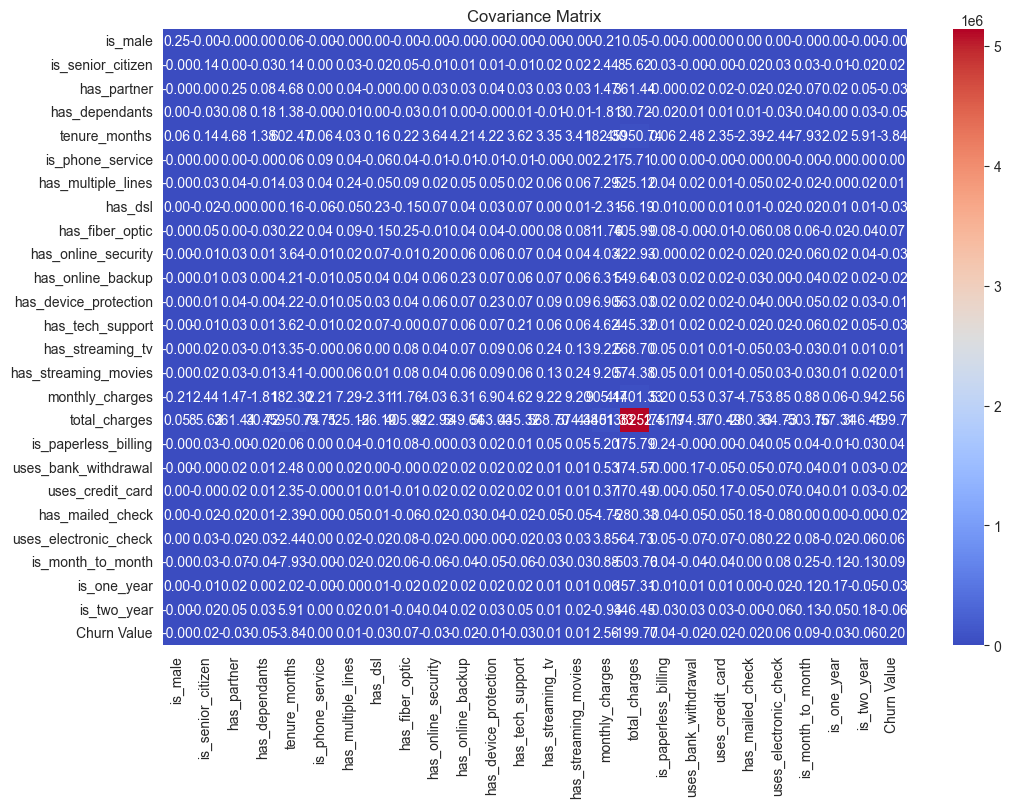

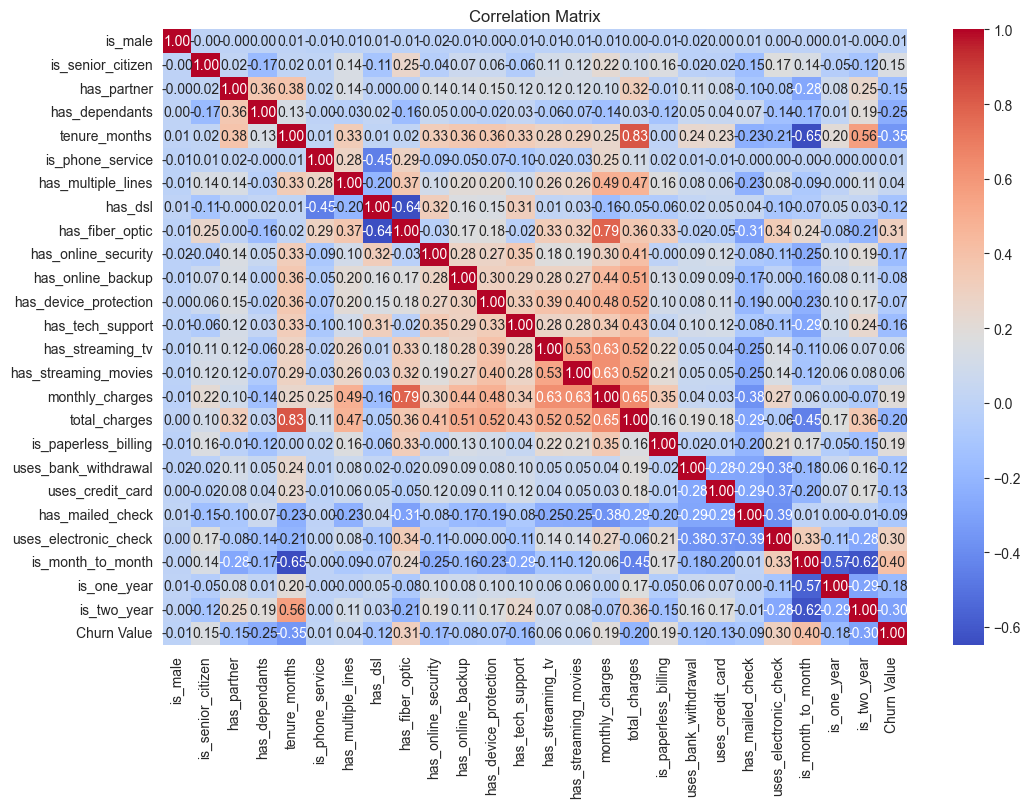

Features to drop: ['total_charges']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Covariance Matrix
cov_matrix = df.cov()
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix")
plt.show()

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Elimination
threshold = 0.8
corr_matrix_abs = corr_matrix.abs()
upper_tri = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(f"Features to drop: {to_drop}")

In [7]:
# Drop the features with high correlation
df = df.drop(columns=to_drop)
selected_features = [feature for feature in selected_features if feature not in to_drop]

# Data Splitting - Test , Train Split , Outliers Removal

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Split data
X = df[selected_features]
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 
# drop the rows where values are outliers in the training set 0.1% and 99.9%
print(f"Number of rows before dropping outliers: {X_train.shape} , {y_train.shape}")
p999 = X_train.quantile(0.999)
p001 = X_train.quantile(0.001)
X_train = X_train[(X_train <= p999).all(axis=1)]
X_train = X_train[(X_train >= p001).all(axis=1)]
y_train = y_train.loc[X_train.index]
print(f"Number of rows after dropping outliers: {X_train.shape} , {y_train.shape}")

Number of rows before dropping outliers: (4922, 24) , (4922,)
Number of rows after dropping outliers: (4912, 24) , (4912,)


# Data Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Checking for important features

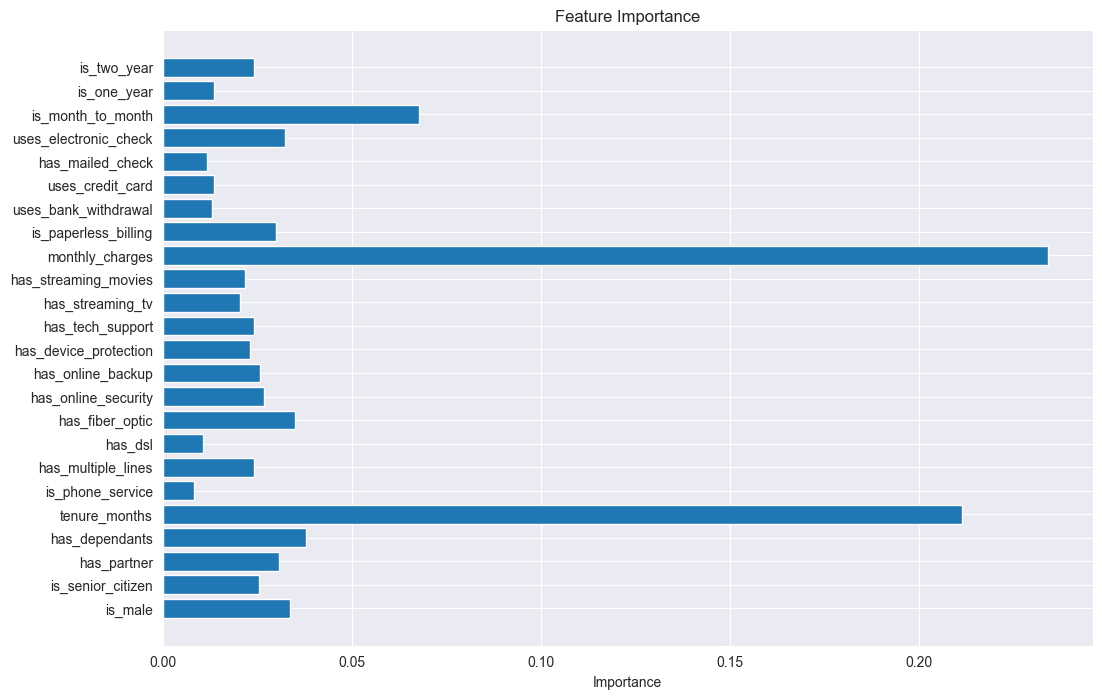

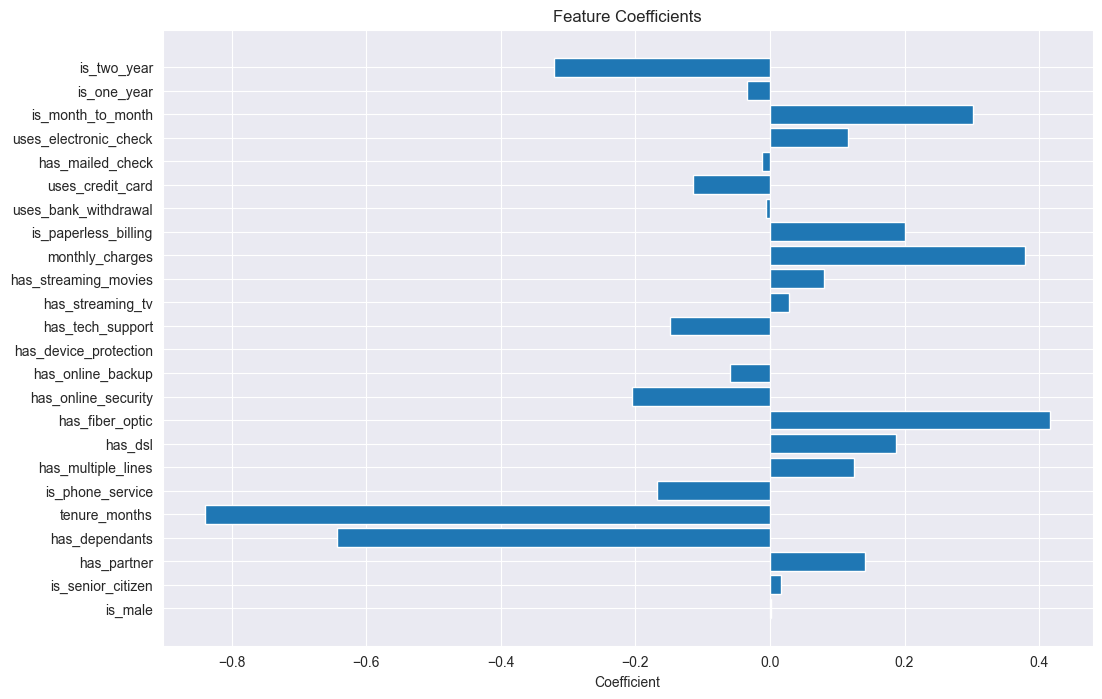

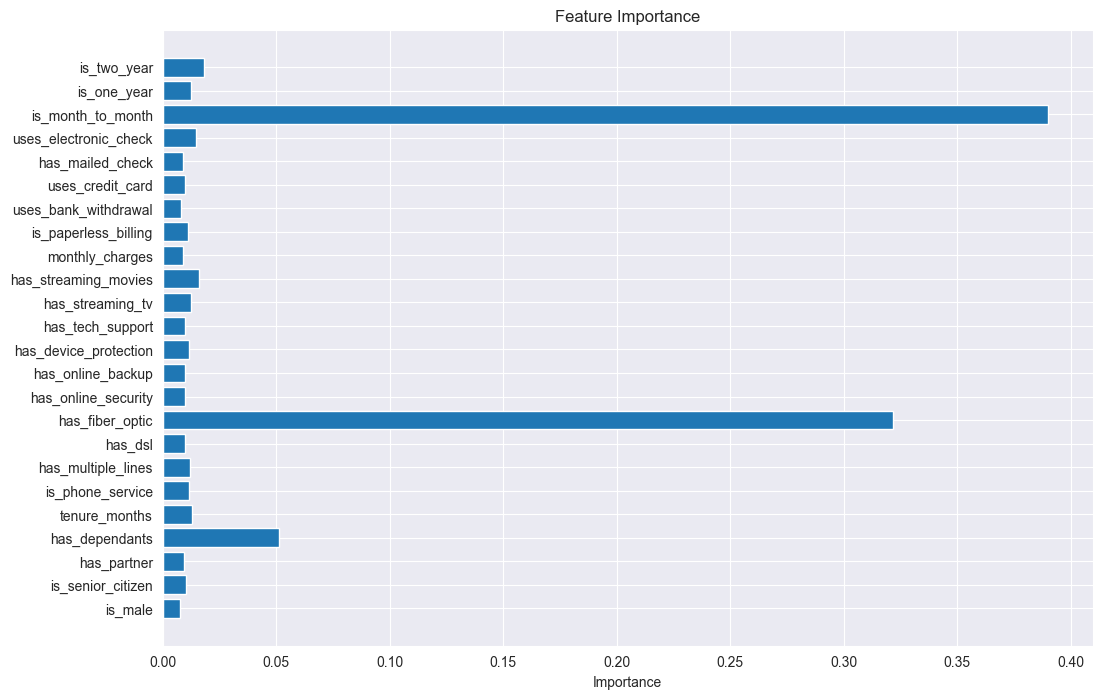

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
features = selected_features
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

coefficients = lr_model.coef_[0]
features = selected_features
plt.figure(figsize=(12, 8))
plt.barh(features, coefficients)
plt.xlabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
features = selected_features
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


# Feature Selection

In [11]:
important_features = ['tenure_months', 'has_fiber_optic', 'monthly_charges', 'is_month_to_month', 'has_dependants','is_phone_service']
X_train = X_train[:, [selected_features.index(feature) for feature in important_features]]
X_test = X_test[:, [selected_features.index(feature) for feature in important_features]]

# Model Training and Evaluation


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

#SEED
SEED = 42

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Hyperparameter Tuning for Random Forest
scoring = {'roc_auc': make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=False), 
               'accuracy': make_scorer(accuracy_score), 
               'precision': make_scorer(precision_score), 
               'recall': make_scorer(recall_score), 
               'f1': make_scorer(f1_score)
              }
param_grid = [{'criterion': ['gini', 'entropy'], # measures split quality
                   'class_weight': ['balanced'], # adjust imbalanced positive class
                   'n_estimators': [50, 100], # number trees to grow            
                   'max_features': ['auto', 6, None], # features considered at splits
                   'max_depth': [4, 6],  # max nodes in each tree
                   'min_samples_leaf': [5], # samples required in each leaf
                   'min_samples_split': [0.1, 0.2, 0.3, 0.4], # percentage required to split node
                    }]
# grid search cv
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='roc_auc' , refit='roc_auc')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]


# Evaluate Models
print("Logistic Regression:")
evaluate_model(y_test, y_pred_lr, y_prob_lr)
print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf, y_prob_rf)
print("\nTuned Random Forest:")
evaluate_model(y_test, y_pred_best_rf, y_prob_best_rf)

C:\Users\Shardul\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Logistic Regression:
Accuracy: 0.81
Precision: 0.69
Recall: 0.55
F1-Score: 0.61
ROC-AUC: 0.86

Random Forest:
Accuracy: 0.77
Precision: 0.61
Recall: 0.51
F1-Score: 0.55
ROC-AUC: 0.82

Tuned Random Forest:
Accuracy: 0.77
Precision: 0.57
Recall: 0.78
F1-Score: 0.66
ROC-AUC: 0.86


C:\Users\Shardul\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shardul\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shardul\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Shardul\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shardul\miniconda3\Li

# Testing xgboost model

In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost:")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

XGBoost:
Accuracy: 0.78
Precision: 0.63
Recall: 0.51
F1-Score: 0.56
ROC-AUC: 0.84


# Model Evaluation

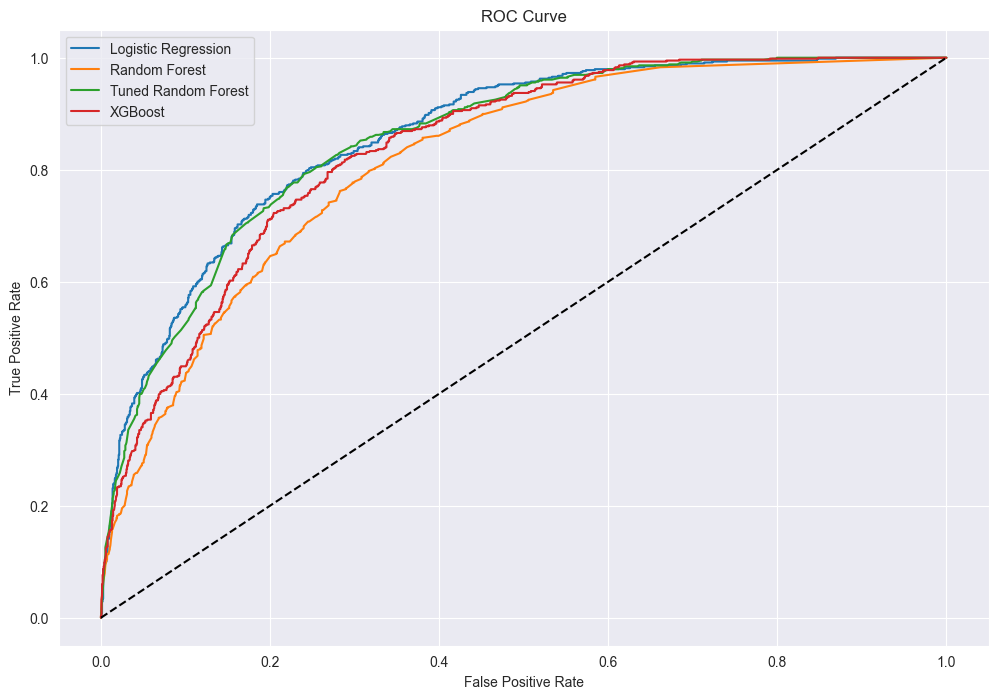

In [16]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)


plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_best_rf, tpr_best_rf, label='Tuned Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()



# Precision Recall Curve

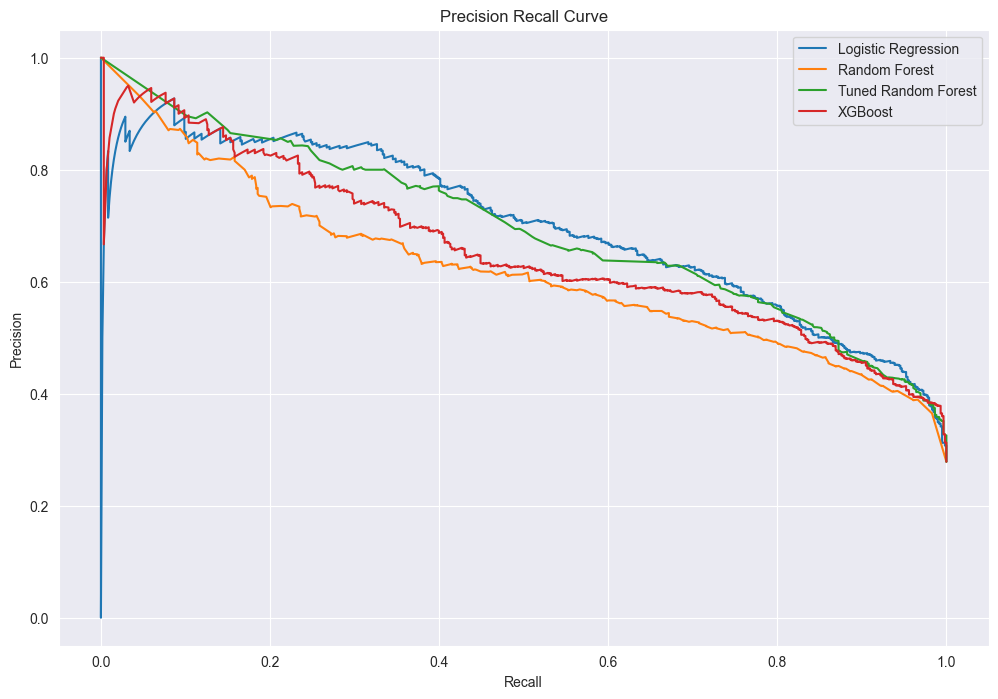

In [17]:
from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
precision_best_rf, recall_best_rf, _ = precision_recall_curve(y_test, y_prob_best_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

plt.figure(figsize=(12, 8))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_best_rf, precision_best_rf, label='Tuned Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()

plt.show()
